 # Mini Project 1- Stock Market Analysis Using Python
Business Scenario: Data Science extracts meaningful insight from chunks of raw data, which is useful to different business segments for planning their future course of action. Finance is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. Here, we will analyze data from the stock market for some technology stocks such as Apple, Google, Amazon, and Microsoft.

Objective: Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the risk of a stock, based on its performance history.

About the Data: The stocks we have chosen are from various industries and market caps namely, • Apple • Google • Microsoft • Amazon

For the start, we shall investigate the Amazon stock individually and then move on to the combined analysis.

To know more about stocks and their data please visit the below link: https://in.finance.yahoo.com/

The following tasks are to be performed:

• Read the Data from Yahoo finance website directly.

• Perform cleaning.

• What was the change in stock price over time?

• Visualize the change in a stock’s volume being traded, over time?

• What was the moving average of various stocks?

• What was the daily return average of a stock?

• Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

• Visualize trend frequency through a Pie Chart.

• What was the correlation between the daily returns of different stocks#

In [1]:
#Importing essential libraries
from pandas_datareader import data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
import  seaborn as sns
sns.set()


1) Read the Data from Yahoo finance website directly

In [2]:
tickers = ['AAPL','MSFT','GOOGL','AMZN']

start_date = '2020-01-01'
end_date = '2022-12-7'

In [3]:

df = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [4]:
df.tail()

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       GOOGL       AMZN        AAPL   
Date                                                                    
2022-12-01  148.309998  254.690002  100.989998  95.500000  148.309998   
2022-12-02  147.809998  255.020004  100.440002  94.129997  147.809998   
2022-12-05  146.630005  250.199997   99.480003  91.010002  146.630005   
2022-12-06  142.910004  245.119995   96.980003  88.250000  142.910004   
2022-12-07  140.940002  244.369995   94.940002  88.459999  140.940002   

Attributes                                           High              ...  \
Symbols           MSFT       GOOGL       AMZN        AAPL        MSFT  ...   
Date                                                                   ...   
2022-12-01  254.690002  100.989998  95.500000  149.130005  256.119995  ...   
2022-12-02  255.020004  100.440002  94.129997  148.000000  256.059998  ...   
2022-12-05  250.199997   99.480003  91.010002  150.919998  253.820007  ...   
2022-12-06  245.119995   96.980003  88.250000  147.300003  251.860001  ...   
2022-12-07  244.369995   94.940002  88.459999  143.369995  246.160004  ...   

Attributes         Low                   Open                          \
Symbols          GOOGL       AMZN        AAPL        MSFT       GOOGL   
Date                                                                    
2022-12-01  100.250000  94.919998  148.210007  253.869995  101.019997   
2022-12-02   98.900002  93.779999  145.960007  249.820007   99.050003   
2022-12-05   99.000000  90.820000  147.770004  252.009995   99.400002   
2022-12-06   96.419998  87.900002  147.070007  250.820007   99.300003   
2022-12-07   94.720001  87.480003  142.190002  244.830002   96.410004   

Attributes                 Volume                                      
Symbols          AMZN        AAPL        MSFT       GOOGL        AMZN  
Date                                                                   
2022-12-01  96.989998  71250400.0  26041500.0  28687100.0  68488000.0  
2022-12-02  94.480003  65421400.0  21522800.0  21469400.0  72427000.0  
2022-12-05  93.050003  68826400.0  23435300.0  24405100.0  71535500.0  
2022-12-06  90.500000  64727200.0  22463700.0  24910700.0  75503600.0  
2022-12-07  88.339996  69675300.0  20472000.0  31029100.0  67977300.0  

[5 rows x 24 columns]

2) perform clean 

In [5]:
df.isnull().sum()

Attributes  Symbols
Adj Close   AAPL       0
            MSFT       0
            GOOGL      0
            AMZN       0
Close       AAPL       0
            MSFT       0
            GOOGL      0
            AMZN       0
High        AAPL       0
            MSFT       0
            GOOGL      0
            AMZN       0
Low         AAPL       0
            MSFT       0
            GOOGL      0
            AMZN       0
Open        AAPL       0
            MSFT       0
            GOOGL      0
            AMZN       0
Volume      AAPL       0
            MSFT       0
            GOOGL      0
            AMZN       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2019-12-31 to 2022-12-07
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   741 non-null    float64
 1   (Adj Close, MSFT)   741 non-null    float64
 2   (Adj Close, GOOGL)  741 non-null    float64
 3   (Adj Close, AMZN)   741 non-null    float64
 4   (Close, AAPL)       741 non-null    float64
 5   (Close, MSFT)       741 non-null    float64
 6   (Close, GOOGL)      741 non-null    float64
 7   (Close, AMZN)       741 non-null    float64
 8   (High, AAPL)        741 non-null    float64
 9   (High, MSFT)        741 non-null    float64
 10  (High, GOOGL)       741 non-null    float64
 11  (High, AMZN)        741 non-null    float64
 12  (Low, AAPL)         741 non-null    float64
 13  (Low, MSFT)         741 non-null    float64
 14  (Low, GOOGL)        741 non-null    float64
 15  (Low, AMZN)         741 non-null    fl

In [7]:
df.describe()

Attributes   Adj Close                                           Close  \
Symbols           AAPL        MSFT       GOOGL        AMZN        AAPL   
count       741.000000  741.000000  741.000000  741.000000  741.000000   
mean        129.073729  242.625867  104.507378  143.588943  130.121906   
std          31.171038   48.719692   26.692498   26.956891   30.922965   
min          55.082977  132.012543   52.706501   83.830498   56.092499   
25%         113.795280  207.382172   77.789001  119.972504  115.320000   
50%         134.869995  243.764160  104.853500  154.919495  135.389999   
75%         150.400497  282.411926  127.549004  164.773499  150.960007   
max         180.959747  339.924835  149.838501  186.570496  182.009995   

Attributes                                            High              ...  \
Symbols           MSFT       GOOGL        AMZN        AAPL        MSFT  ...   
count       741.000000  741.000000  741.000000  741.000000  741.000000  ...   
mean        245.775276  104.507378  143.588943  131.686340  248.464561  ...   
std          48.160860   26.692498   26.956891   31.199675   48.286777  ...   
min         135.419998   52.706501   83.830498   57.125000  140.570007  ...   
25%         211.750000   77.789001  119.972504  116.750000  214.509995  ...   
50%         245.179993  104.853500  154.919495  137.330002  247.839996  ...   
75%         284.910004  127.549004  164.773499  152.199997  288.619995  ...   
max         343.109985  149.838501  186.570496  182.940002  349.670013  ...   

Attributes         Low                    Open                          \
Symbols          GOOGL        AMZN        AAPL        MSFT       GOOGL   
count       741.000000  741.000000  741.000000  741.000000  741.000000   
mean        103.264735  141.664597  130.021083  245.702901  104.491196   
std          26.536300   26.953765   30.949387   48.249776   26.774464   
min          50.443501   81.301498   57.020000  137.009995   52.818501   
25%          76.258499  117.750000  115.489998  211.669998   77.500504   
50%         103.660004  153.125000  135.830002  245.089996  104.587502   
75%         126.294998  163.218002  150.630005  285.190002  127.844002   
max         148.899002  184.839493  182.630005  344.619995  151.250000   

Attributes                    Volume                                            
Symbols           AMZN          AAPL          MSFT         GOOGL          AMZN  
count       741.000000  7.410000e+02  7.410000e+02  7.410000e+02  7.410000e+02  
mean        143.689617  1.126942e+08  3.166007e+07  3.518371e+07  8.094484e+07  
std          27.048145  5.634041e+07  1.348809e+07  1.560639e+07  3.564620e+07  
min          82.075500  3.519590e+07  9.200800e+06  9.312000e+06  2.903800e+07  
25%         119.497498  7.646840e+07  2.285540e+07  2.506830e+07  5.671200e+07  
50%         155.248505  9.604190e+07  2.835730e+07  3.143200e+07  7.058500e+07  
75%         164.980499  1.300152e+08  3.569480e+07  4.036800e+07  9.545800e+07  
max         187.199997  4.265100e+08  9.701270e+07  1.232000e+08  3.113460e+08  

[8 rows x 24 columns]

In [8]:
df.reset_index(inplace=True)
df.set_index("Date",inplace=True)
df

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       GOOGL       AMZN        AAPL   
Date                                                                    
2019-12-31   71.920570  153.313187   66.969498  92.391998   73.412498   
2020-01-02   73.561531  156.151962   68.433998  94.900497   75.087502   
2020-01-03   72.846375  154.207596   68.075996  93.748497   74.357498   
2020-01-06   73.426842  154.606155   69.890503  95.143997   74.949997   
2020-01-07   73.081512  153.196518   69.755501  95.343002   74.597504   
...                ...         ...         ...        ...         ...   
2022-12-01  148.309998  254.690002  100.989998  95.500000  148.309998   
2022-12-02  147.809998  255.020004  100.440002  94.129997  147.809998   
2022-12-05  146.630005  250.199997   99.480003  91.010002  146.630005   
2022-12-06  142.910004  245.119995   96.980003  88.250000  142.910004   
2022-12-07  140.940002  244.369995   94.940002  88.459999  140.940002   

Attributes                                           High              ...  \
Symbols           MSFT       GOOGL       AMZN        AAPL        MSFT  ...   
Date                                                                   ...   
2019-12-31  157.699997   66.969498  92.391998   73.419998  157.770004  ...   
2020-01-02  160.619995   68.433998  94.900497   75.150002  160.729996  ...   
2020-01-03  158.619995   68.075996  93.748497   75.144997  159.949997  ...   
2020-01-06  159.029999   69.890503  95.143997   74.989998  159.100006  ...   
2020-01-07  157.580002   69.755501  95.343002   75.224998  159.669998  ...   
...                ...         ...        ...         ...         ...  ...   
2022-12-01  254.690002  100.989998  95.500000  149.130005  256.119995  ...   
2022-12-02  255.020004  100.440002  94.129997  148.000000  256.059998  ...   
2022-12-05  250.199997   99.480003  91.010002  150.919998  253.820007  ...   
2022-12-06  245.119995   96.980003  88.250000  147.300003  251.860001  ...   
2022-12-07  244.369995   94.940002  88.459999  143.369995  246.160004  ...   

Attributes         Low                   Open                          \
Symbols          GOOGL       AMZN        AAPL        MSFT       GOOGL   
Date                                                                    
2019-12-31   66.606499  91.611504   72.482498  156.770004   66.789497   
2020-01-02   67.324501  93.207497   74.059998  158.779999   67.420502   
2020-01-03   67.365997  93.224998   74.287498  158.320007   67.400002   
2020-01-06   67.550003  93.000000   73.447502  157.080002   67.581497   
2020-01-07   69.578003  94.601997   74.959999  159.320007   70.023003   
...                ...        ...         ...         ...         ...   
2022-12-01  100.250000  94.919998  148.210007  253.869995  101.019997   
2022-12-02   98.900002  93.779999  145.960007  249.820007   99.050003   
2022-12-05   99.000000  90.820000  147.770004  252.009995   99.400002   
2022-12-06   96.419998  87.900002  147.070007  250.820007   99.300003   
2022-12-07   94.720001  87.480003  142.190002  244.830002   96.410004   

Attributes                  Volume                                      
Symbols          AMZN         AAPL        MSFT       GOOGL        AMZN  
Date                                                                    
2019-12-31  92.099998  100805600.0  18369400.0  19514000.0  50130000.0  
2020-01-02  93.750000  135480400.0  22622100.0  27278000.0  80580000.0  
2020-01-03  93.224998  146322800.0  21116200.0  23408000.0  75288000.0  
2020-01-06  93.000000  118387200.0  20813700.0  46768000.0  81236000.0  
2020-01-07  95.224998  108872000.0  21634100.0  34330000.0  80898000.0  
...               ...          ...         ...         ...         ...  
2022-12-01  96.989998   71250400.0  26041500.0  28687100.0  68488000.0  
2022-12-02  94.480003   65421400.0  21522800.0  21469400.0  72427000.0  
2022-12-05  93.050003   68826400.0  23435300.0  24405100.0

3) What was the change in stock price over time?

In [9]:
data_1 = df['Adj Close']
data_1.head()

Symbols,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2019-12-31,71.920570,153.313187,66.969498,92.391998
2020-01-02,73.561531,156.151962,68.433998,94.900497
2020-01-03,72.846375,154.207596,68.075996,93.748497
2020-01-06,73.426842,154.606155,69.890503,95.143997
2020-01-07,73.081512,153.196518,69.755501,95.343002


In [10]:
daily_return = data_1.pct_change(1)
daily_return.head()

Symbols,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-02,0.022816,0.018516,0.021868,0.027151
2020-01-03,-0.009722,-0.012452,-0.005231,-0.012139
2020-01-06,0.007968,0.002585,0.026654,0.014886
2020-01-07,-0.004703,-0.009118,-0.001932,0.002092


In [11]:
daily_return.describe()

Symbols,AAPL,MSFT,GOOGL,AMZN
count,740.000000,740.000000,740.000000,740.000000
mean,0.001181,0.000872,0.000709,0.000246
std,0.023322,0.021979,0.021805,0.024688
min,-0.128647,-0.147390,-0.116341,-0.140494
25%,-0.010644,-0.009669,-0.009570,-0.012586
50%,0.000725,0.000716,0.001150,0.000681
75%,0.014373,0.012335,0.012076,0.012221
max,0.119808,0.142169,0.092412,0.135359


4) Visualize the change in a stock’s volume being traded, over time?

In [12]:
data_2 = df['Volume']
data_2.pct_change(1) 

Symbols,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-02,0.343977,0.231510,0.397868,0.607421
2020-01-03,0.080029,-0.066568,-0.141873,-0.065674
2020-01-06,-0.190918,-0.014325,0.997949,0.079003
2020-01-07,-0.080374,0.039416,-0.265951,-0.004161
...,...,...,...,...
2022-12-01,-0.359400,-0.452378,-0.341923,-0.332659
2022-12-02,-0.081810,-0.173519,-0.251601,0.057514
2022-12-05,0.052047,0.088859,0.136739,-0.012309


In [13]:
volume_Apple = data_2['AAPL']
volume_Microsoft = data_2['MSFT']
volume_Google = data_2['GOOGL']
volume_Amazon = data_2['AMZN']

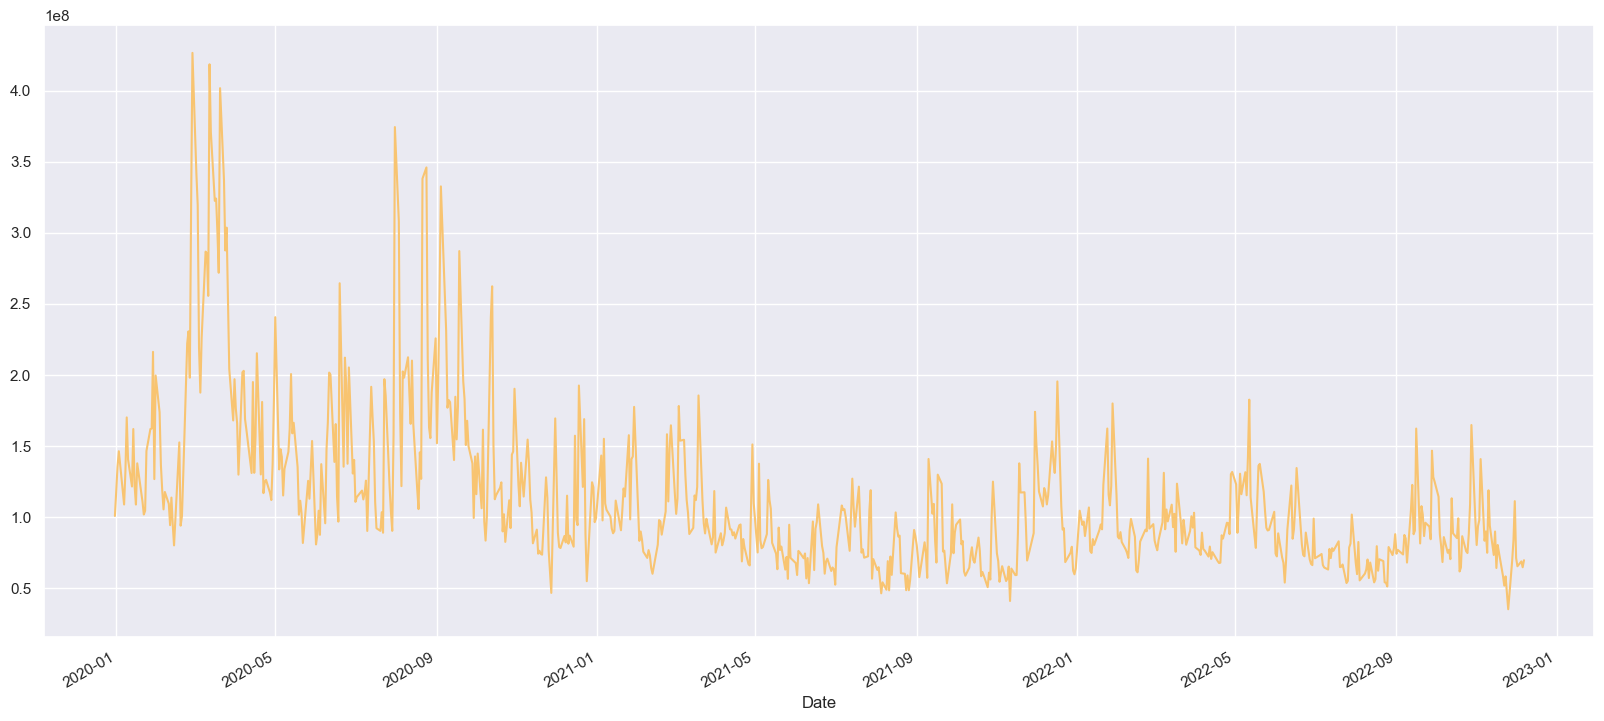

In [14]:
volume_Apple.plot(figsize=(20,9),color='#F8C471')
plt.show()



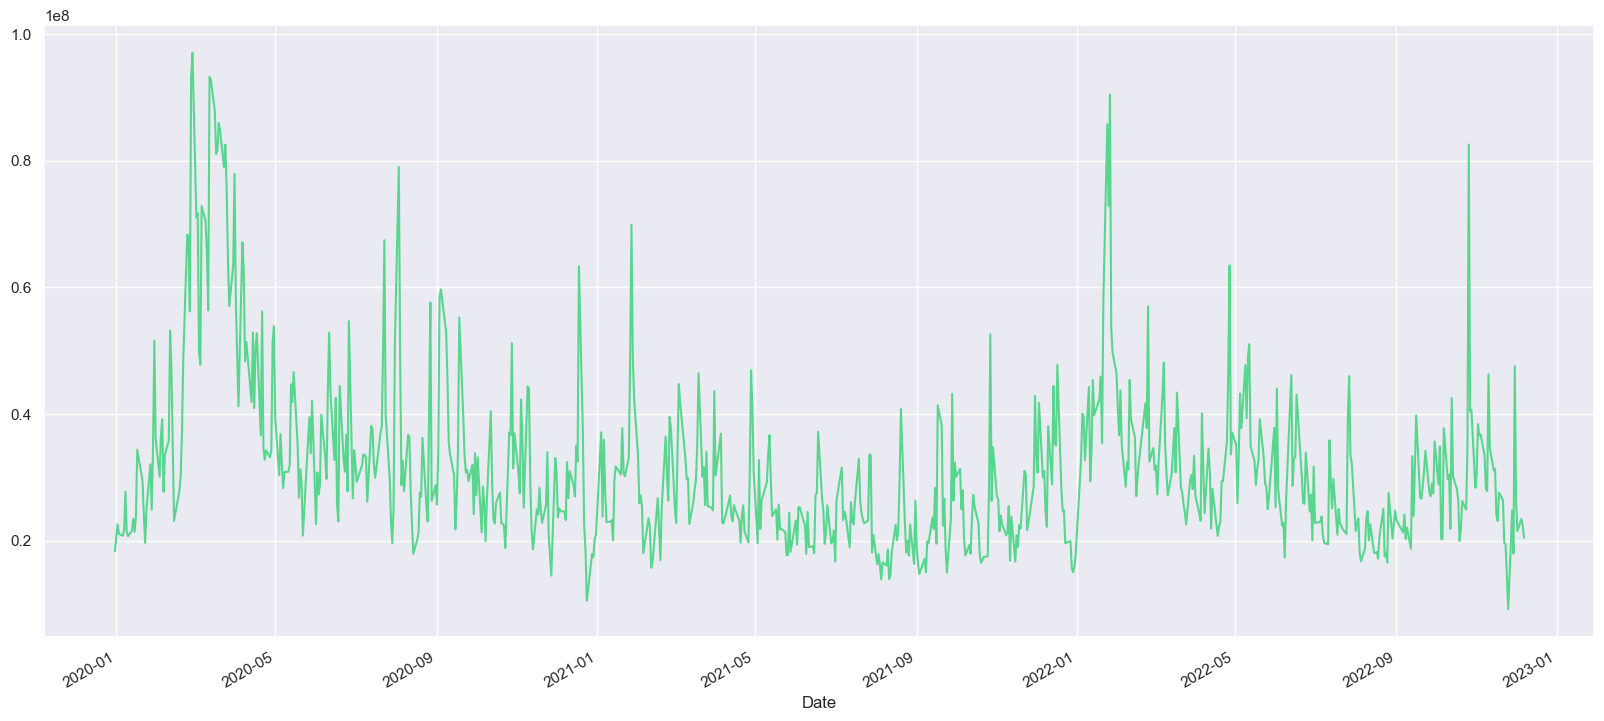

In [15]:
volume_Microsoft.plot(figsize=(20,9), color='#58D68D')
plt.show()

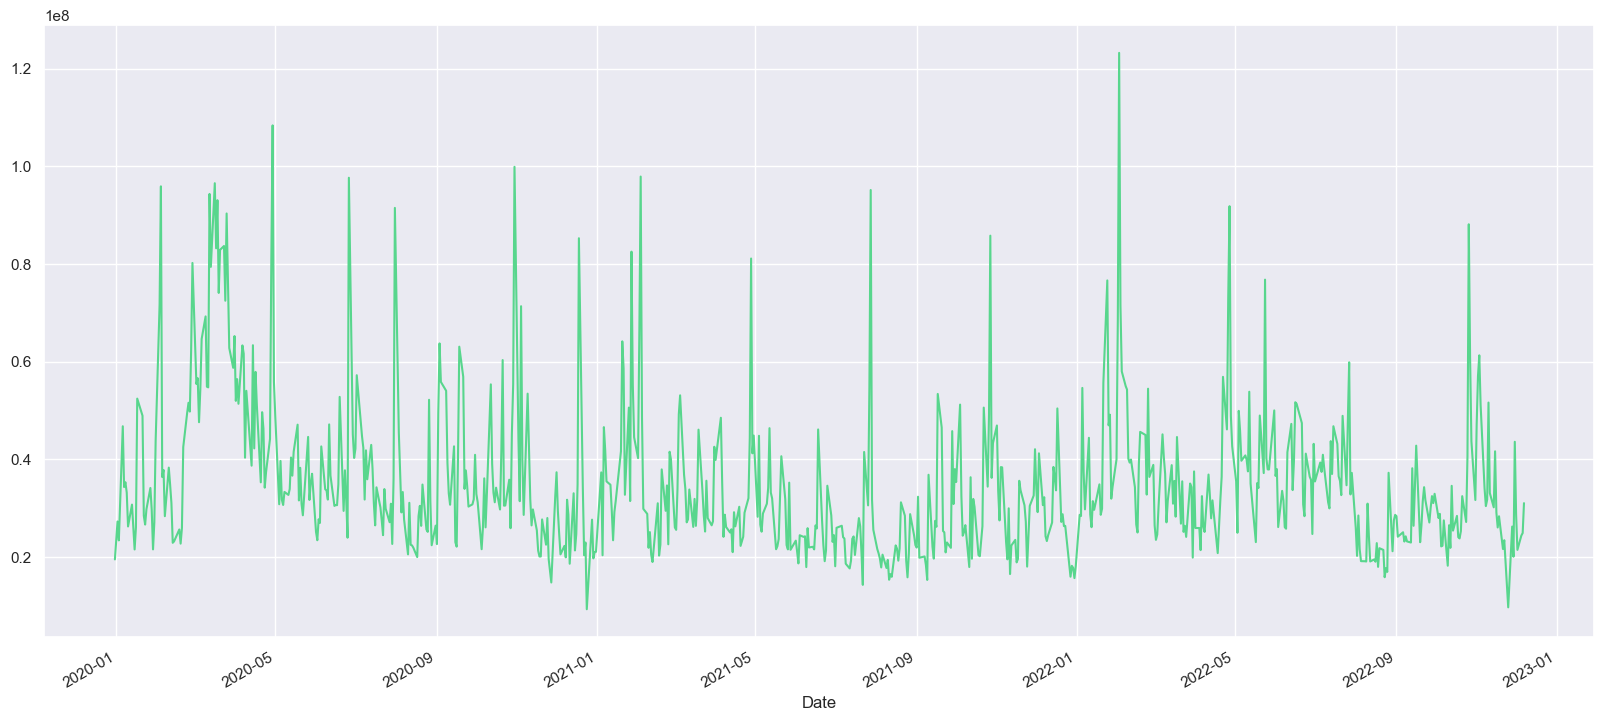

In [16]:
volume_Google.plot(figsize=(20,9), color='#58D68D')
plt.show()

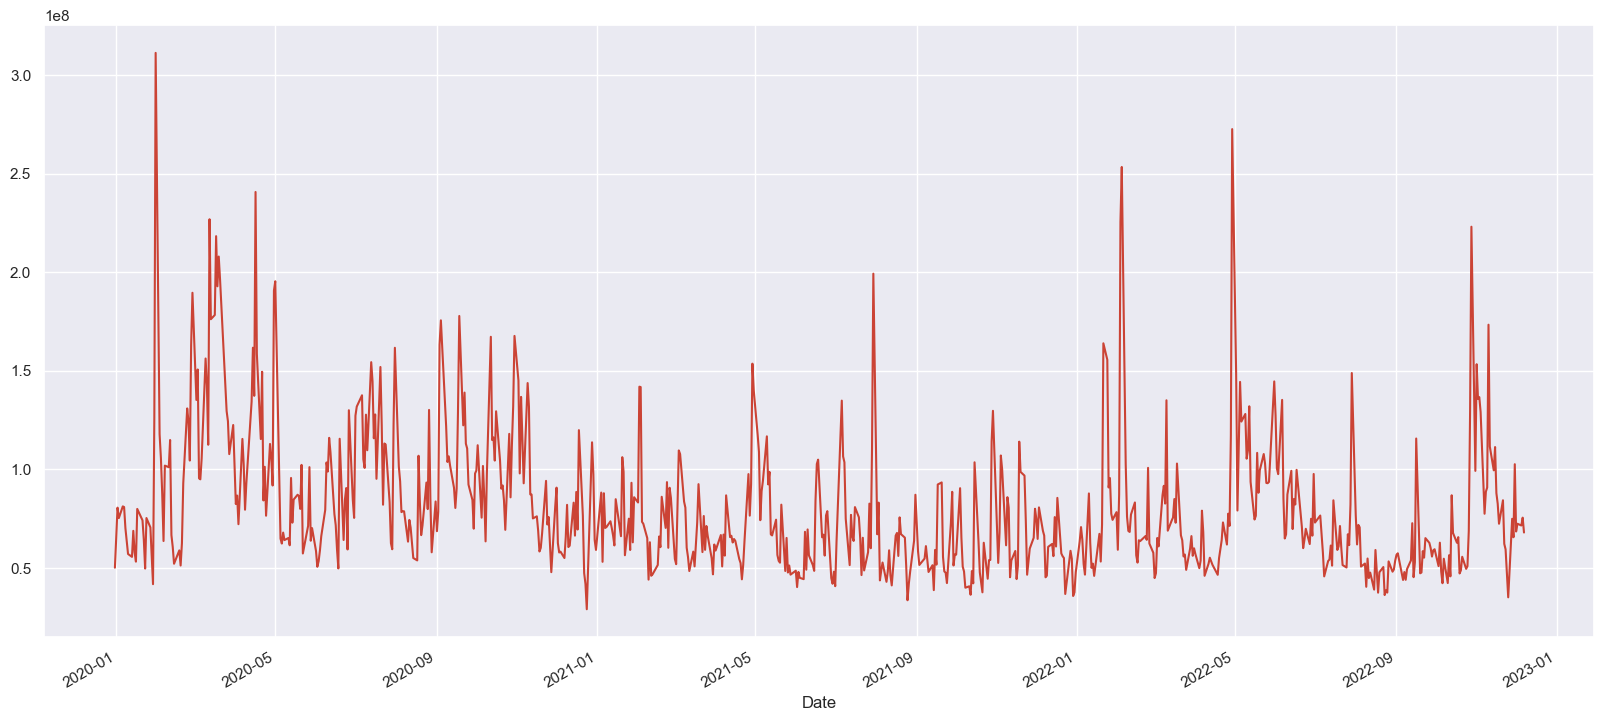

In [17]:
volume_Amazon.plot(figsize=(20,9),color='#CB4335')
plt.show()

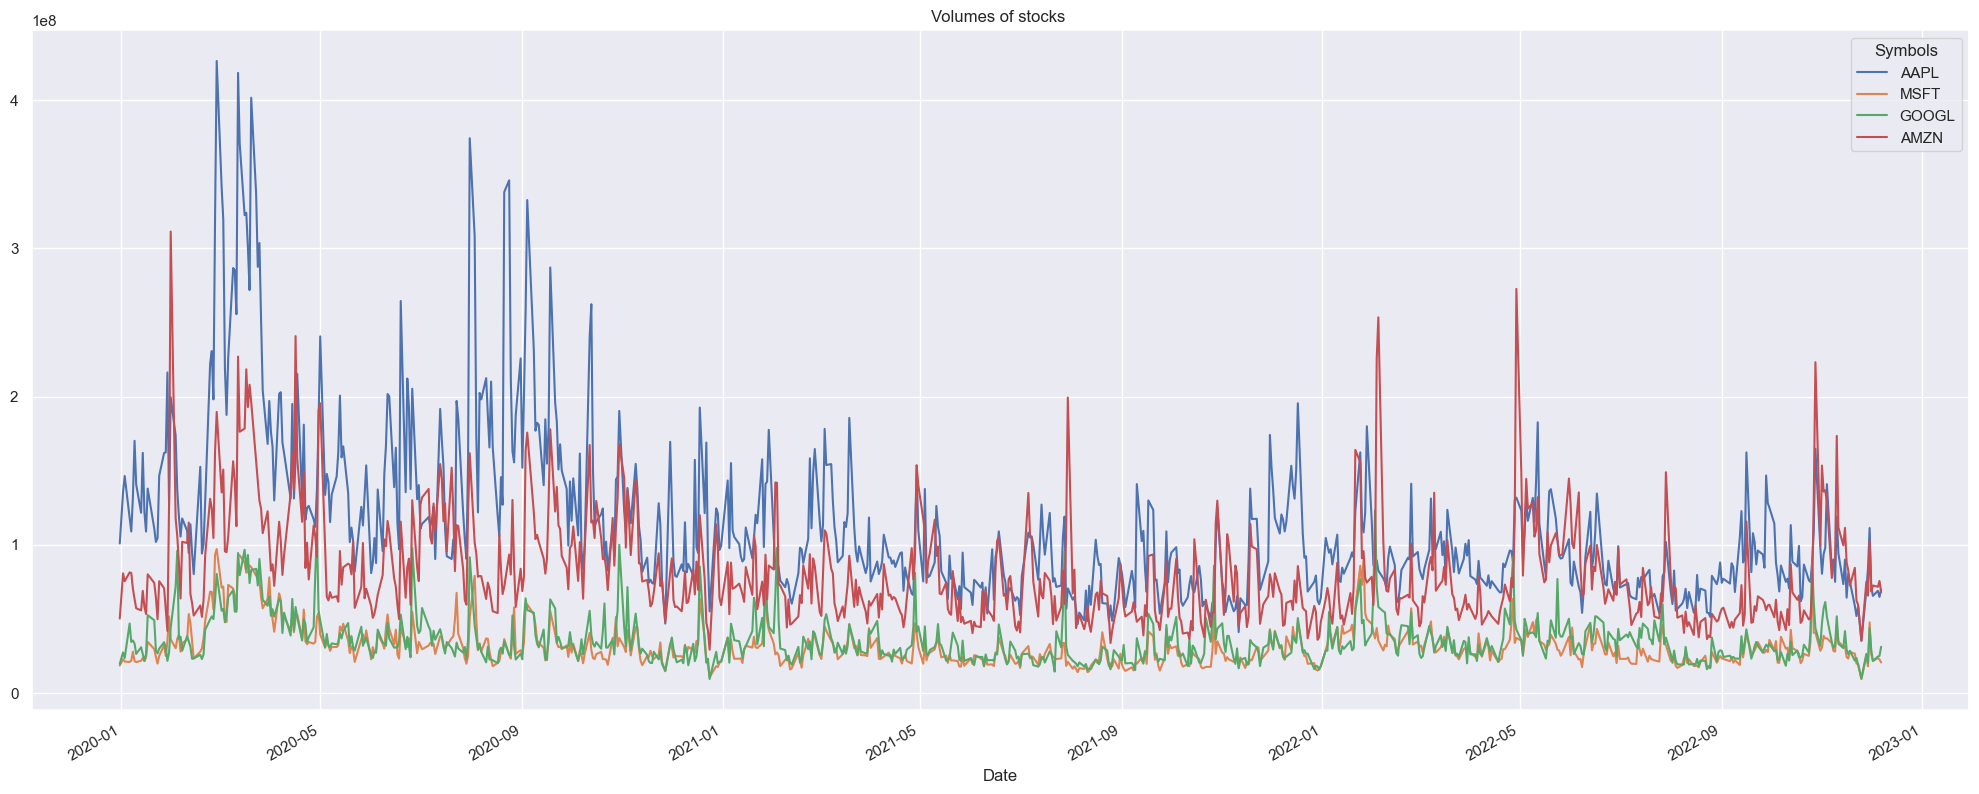

In [18]:
data_2.plot(figsize=(25,10))
plt.title('Volumes of stocks ')
plt.show()

5) What was the moving average of various stocks?

Moving averages are used to identify significant support and resistance levels.
Traders watch for crossovers of longer-term moving averages by shorter-term moving averages as possible indicators of trend changes to enter long and short positions.

In [19]:
data_1

Symbols,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2019-12-31,71.920570,153.313187,66.969498,92.391998
2020-01-02,73.561531,156.151962,68.433998,94.900497
2020-01-03,72.846375,154.207596,68.075996,93.748497
2020-01-06,73.426842,154.606155,69.890503,95.143997
2020-01-07,73.081512,153.196518,69.755501,95.343002
...,...,...,...,...
2022-12-01,148.309998,254.690002,100.989998,95.500000
2022-12-02,147.809998,255.020004,100.440002,94.129997
2022-12-05,146.630005,250.199997,99.480003,91.010002


In [20]:
mva_short_term = data_1.rolling(50).mean()
mva_long_term  = data_1.rolling(200).mean()

In [21]:
mva_short_term.tail()

Symbols,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2022-12-01,145.700816,237.074394,96.7440,105.5708
2022-12-02,145.607275,237.368738,96.7500,105.1072
2022-12-05,145.536258,237.627710,96.7648,104.6518
2022-12-06,145.384052,237.794456,96.7410,104.1138
2022-12-07,145.172679,237.966943,96.6898,103.5948


In [22]:
mva_long_term.tail()

Symbols,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2022-12-01,153.667093,264.119027,113.553640,125.436013
2022-12-02,153.547278,263.907461,113.367150,125.116160
2022-12-05,153.439831,263.715328,113.201855,124.797948
2022-12-06,153.321648,263.511693,113.034740,124.476190
2022-12-07,153.208448,263.305351,112.860373,124.167503


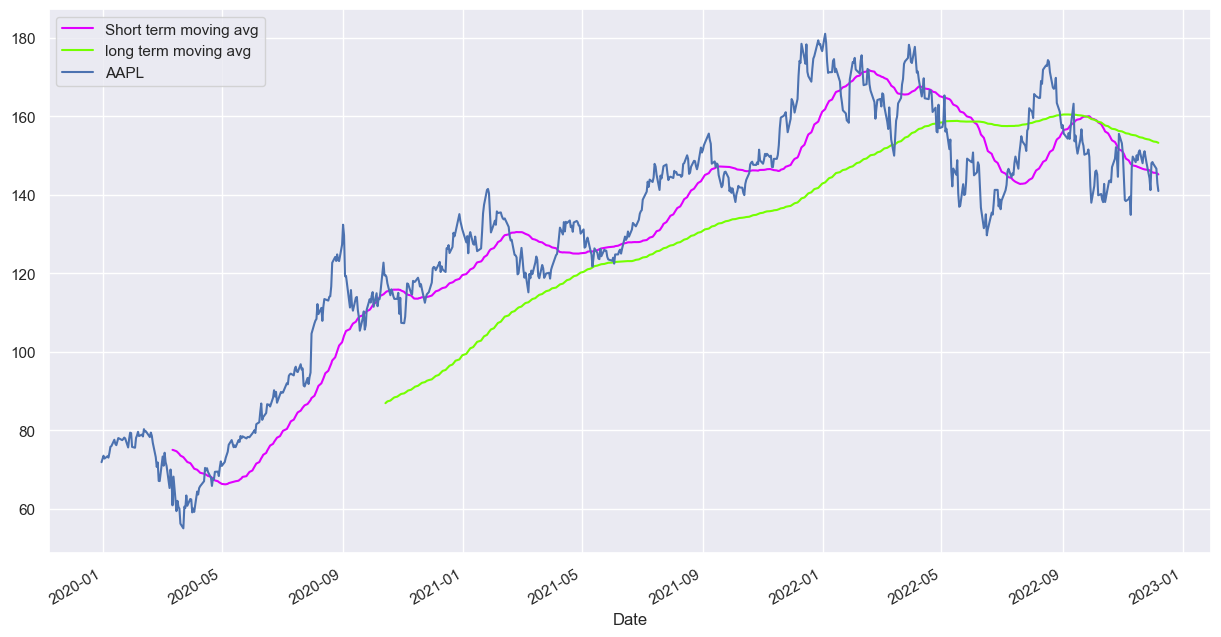

In [23]:
mva_short_term_Apple = mva_short_term['AAPL']
mva_long_term_Apple = mva_long_term['AAPL']

mva_short_term_Apple.plot(label = 'Short term moving avg',color = '#E000FF' ,figsize = (15,8))
mva_long_term_Apple.plot(label = 'long term moving avg',color = '#74FF00' )
data_1['AAPL'].plot()
plt.legend()
plt.show()


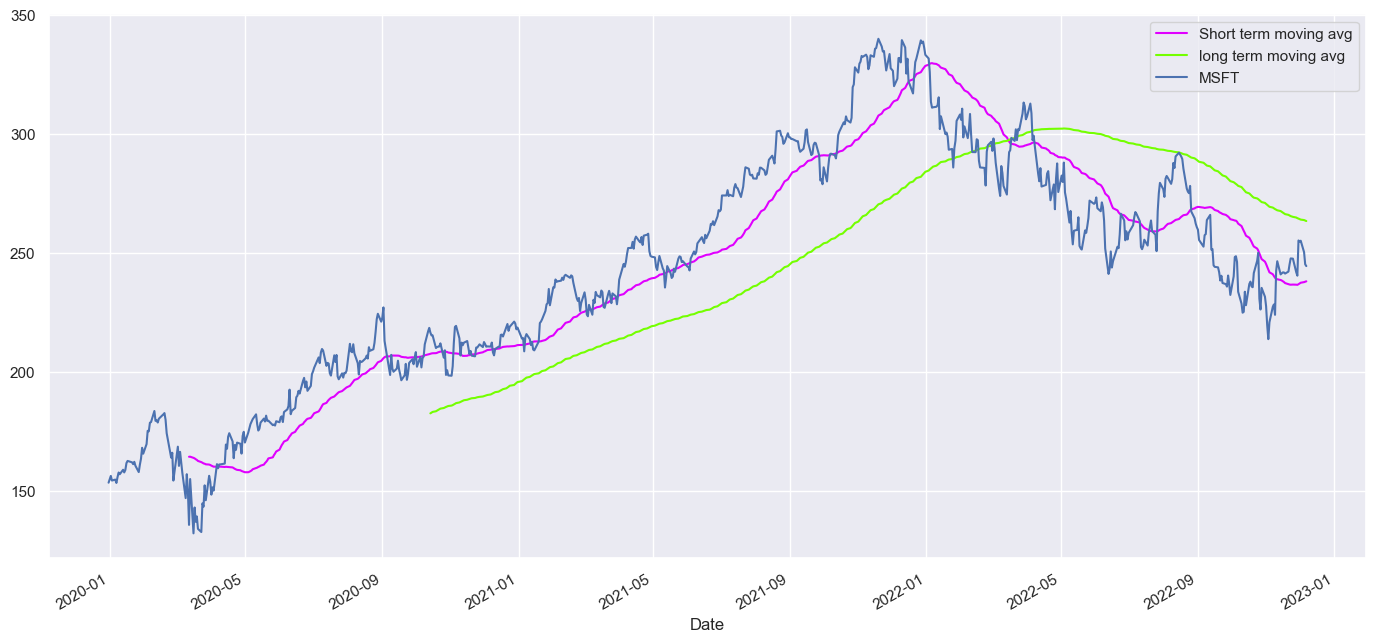

In [24]:
mva_short_term_Microsoft = mva_short_term['MSFT']
mva_long_term_Microsft  = mva_long_term['MSFT']

mva_short_term_Microsoft.plot(label = 'Short term moving avg' ,color = '#E000FF'  , figsize = (17,8))
mva_long_term_Microsft.plot(label = 'long term moving avg', color = '#74FF00')
data_1['MSFT'].plot()
plt.legend()
plt.show()

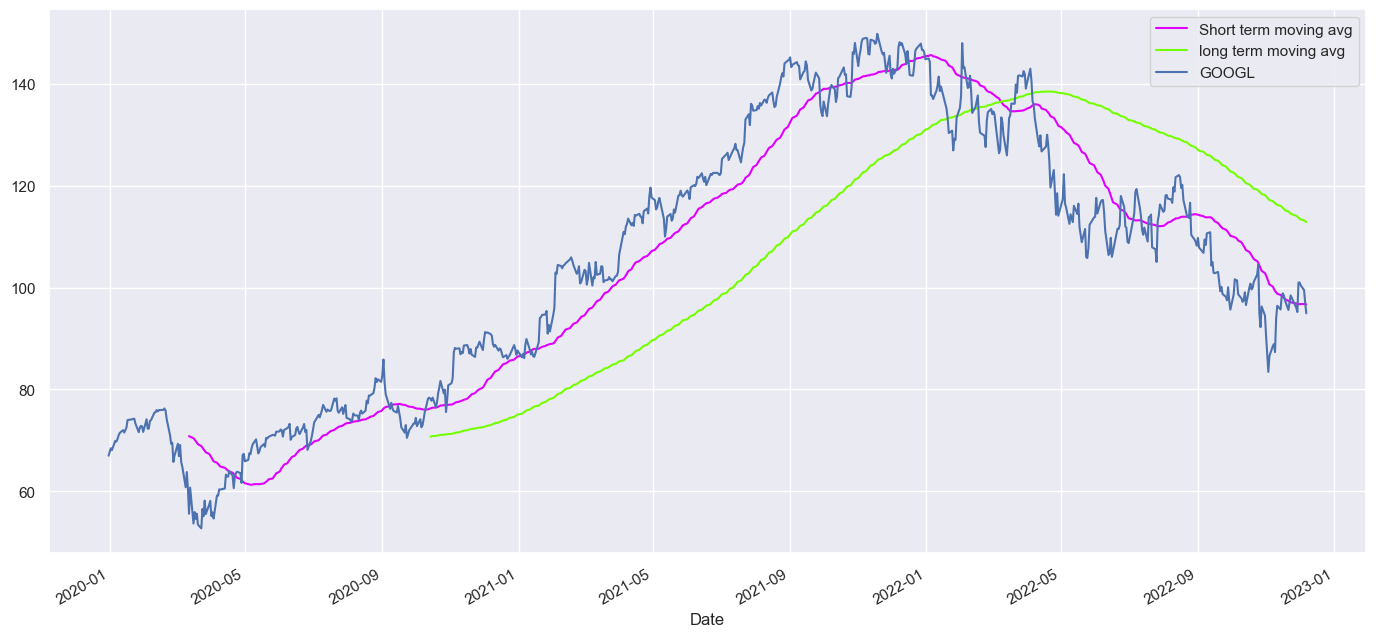

In [25]:
mva_short_term_google = mva_short_term['GOOGL']
mva_long_term_google = mva_long_term['GOOGL']

mva_short_term_google.plot(label = 'Short term moving avg' ,color = '#E000FF' , figsize = (17,8))
mva_long_term_google.plot(label = 'long term moving avg', color = '#74FF00')
data_1['GOOGL'].plot()
plt.legend()
plt.show()

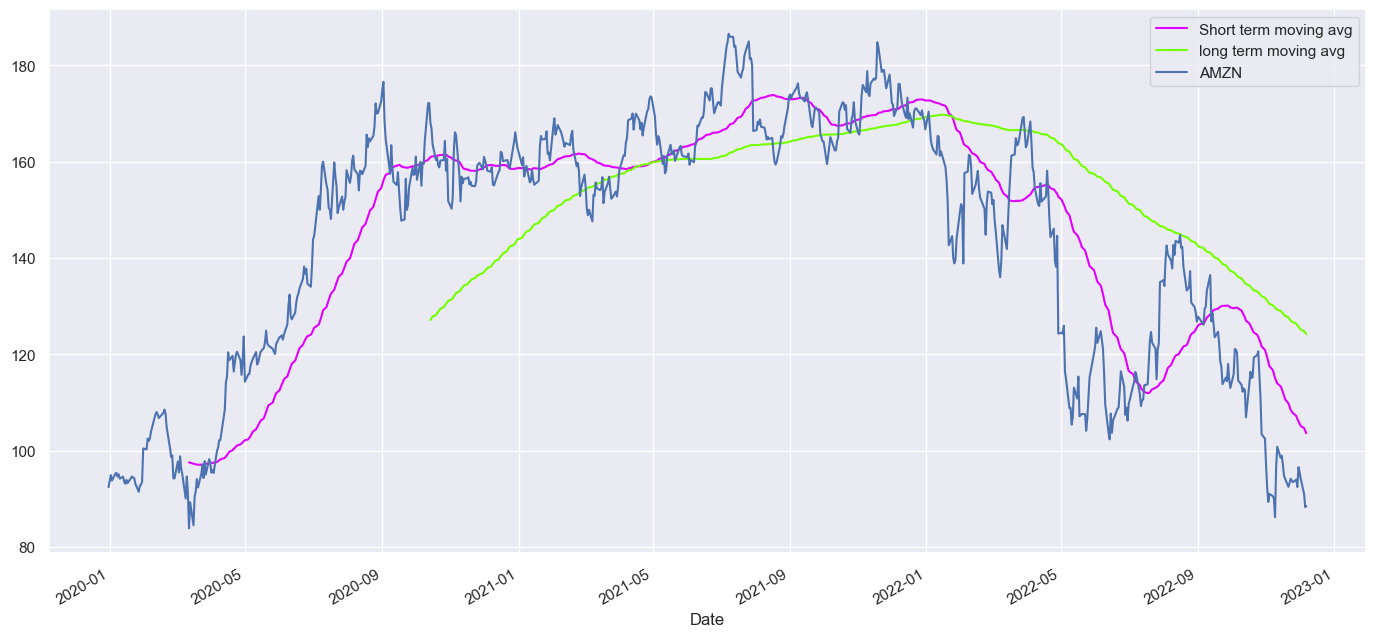

In [26]:
mva_short_term_amazon = mva_short_term['AMZN']
mva_long_term_amazon = mva_long_term['AMZN']

mva_short_term_amazon.plot(label = 'Short term moving avg' ,color = '#E000FF' , figsize = (17,8))
mva_long_term_amazon.plot(label = 'long term moving avg', color = '#74FF00')
data_1['AMZN'].plot()
plt.legend()
plt.show()

6) What was the daily return average of a stock?

In [27]:
daily_return_avg = data_1.pct_change()*100
daily_return_avg

Symbols,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-02,2.281629,1.851619,2.186817,2.715061
2020-01-03,-0.972188,-1.245176,-0.523134,-1.213903
2020-01-06,0.796837,0.258457,2.665413,1.488557
2020-01-07,-0.470304,-0.911760,-0.193162,0.209162
...,...,...,...,...
2022-12-01,0.189150,-0.176373,0.000000,-1.077275
2022-12-02,-0.337132,0.129570,-0.544604,-1.434558
2022-12-05,-0.798317,-1.890051,-0.955794,-3.314560


In [28]:
daily_return_Apple = daily_return_avg['AAPL']
daily_return_Microsft = daily_return_avg['MSFT']
daily_return_Google = daily_return_avg['GOOGL']
daily_return_Amazon = daily_return_avg['AMZN']

In [29]:
df['Apple_return'] = daily_return_Apple
df['Microsoft_return']= daily_return_Microsft
df['Google_return'] = daily_return_Google
df['Amazon_retrun'] = daily_return_Amazon

In [30]:
df

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       GOOGL       AMZN        AAPL   
Date                                                                    
2019-12-31   71.920570  153.313187   66.969498  92.391998   73.412498   
2020-01-02   73.561531  156.151962   68.433998  94.900497   75.087502   
2020-01-03   72.846375  154.207596   68.075996  93.748497   74.357498   
2020-01-06   73.426842  154.606155   69.890503  95.143997   74.949997   
2020-01-07   73.081512  153.196518   69.755501  95.343002   74.597504   
...                ...         ...         ...        ...         ...   
2022-12-01  148.309998  254.690002  100.989998  95.500000  148.309998   
2022-12-02  147.809998  255.020004  100.440002  94.129997  147.809998   
2022-12-05  146.630005  250.199997   99.480003  91.010002  146.630005   
2022-12-06  142.910004  245.119995   96.980003  88.250000  142.910004   
2022-12-07  140.940002  244.369995   94.940002  88.459999  140.940002   

Attributes                                           High              ...  \
Symbols           MSFT       GOOGL       AMZN        AAPL        MSFT  ...   
Date                                                                   ...   
2019-12-31  157.699997   66.969498  92.391998   73.419998  157.770004  ...   
2020-01-02  160.619995   68.433998  94.900497   75.150002  160.729996  ...   
2020-01-03  158.619995   68.075996  93.748497   75.144997  159.949997  ...   
2020-01-06  159.029999   69.890503  95.143997   74.989998  159.100006  ...   
2020-01-07  157.580002   69.755501  95.343002   75.224998  159.669998  ...   
...                ...         ...        ...         ...         ...  ...   
2022-12-01  254.690002  100.989998  95.500000  149.130005  256.119995  ...   
2022-12-02  255.020004  100.440002  94.129997  148.000000  256.059998  ...   
2022-12-05  250.199997   99.480003  91.010002  150.919998  253.820007  ...   
2022-12-06  245.119995   96.980003  88.250000  147.300003  251.860001  ...   
2022-12-07  244.369995   94.940002  88.459999  143.369995  246.160004  ...   

Attributes        Open                  Volume                          \
Symbols          GOOGL       AMZN         AAPL        MSFT       GOOGL   
Date                                                                     
2019-12-31   66.789497  92.099998  100805600.0  18369400.0  19514000.0   
2020-01-02   67.420502  93.750000  135480400.0  22622100.0  27278000.0   
2020-01-03   67.400002  93.224998  146322800.0  21116200.0  23408000.0   
2020-01-06   67.581497  93.000000  118387200.0  20813700.0  46768000.0   
2020-01-07   70.023003  95.224998  108872000.0  21634100.0  34330000.0   
...                ...        ...          ...         ...         ...   
2022-12-01  101.019997  96.989998   71250400.0  26041500.0  28687100.0   
2022-12-02   99.050003  94.480003   65421400.0  21522800.0  21469400.0   
2022-12-05   99.400002  93.050003   68826400.0  23435300.0  24405100.0   
2022-12-06   99.300003  90.500000   64727200.0  22463700.0  24910700.0   
2022-12-07   96.410004  88.339996   69675300.0  20472000.0  31029100.0   

Attributes             Apple_return Microsoft_return Google_return  \
Symbols           AMZN                                               
Date                                                                 
2019-12-31  50130000.0          NaN              NaN           NaN   
2020-01-02  80580000.0     2.281629         1.851619      2.186817   
2020-01-03  75288000.0    -0.972188        -1.245176     -0.523134   
2020-01-06  81236000.0     0.796837         0.258457      2.665413   
2020-01-07  80898000.0    -0.470304        -0.911760     -0.193162   
...                ...          ...              ...           ...   
2022-12-01  68488000.0     0.189150        -0.176373      0.000000   
2022-12-02  72427000.0    -0.337132         0.129570     -0.544604   
2022-12-05  71535500.0    -0.798317        -1.890051     -0.955794   
2022-12

<AxesSubplot:xlabel='Date'>

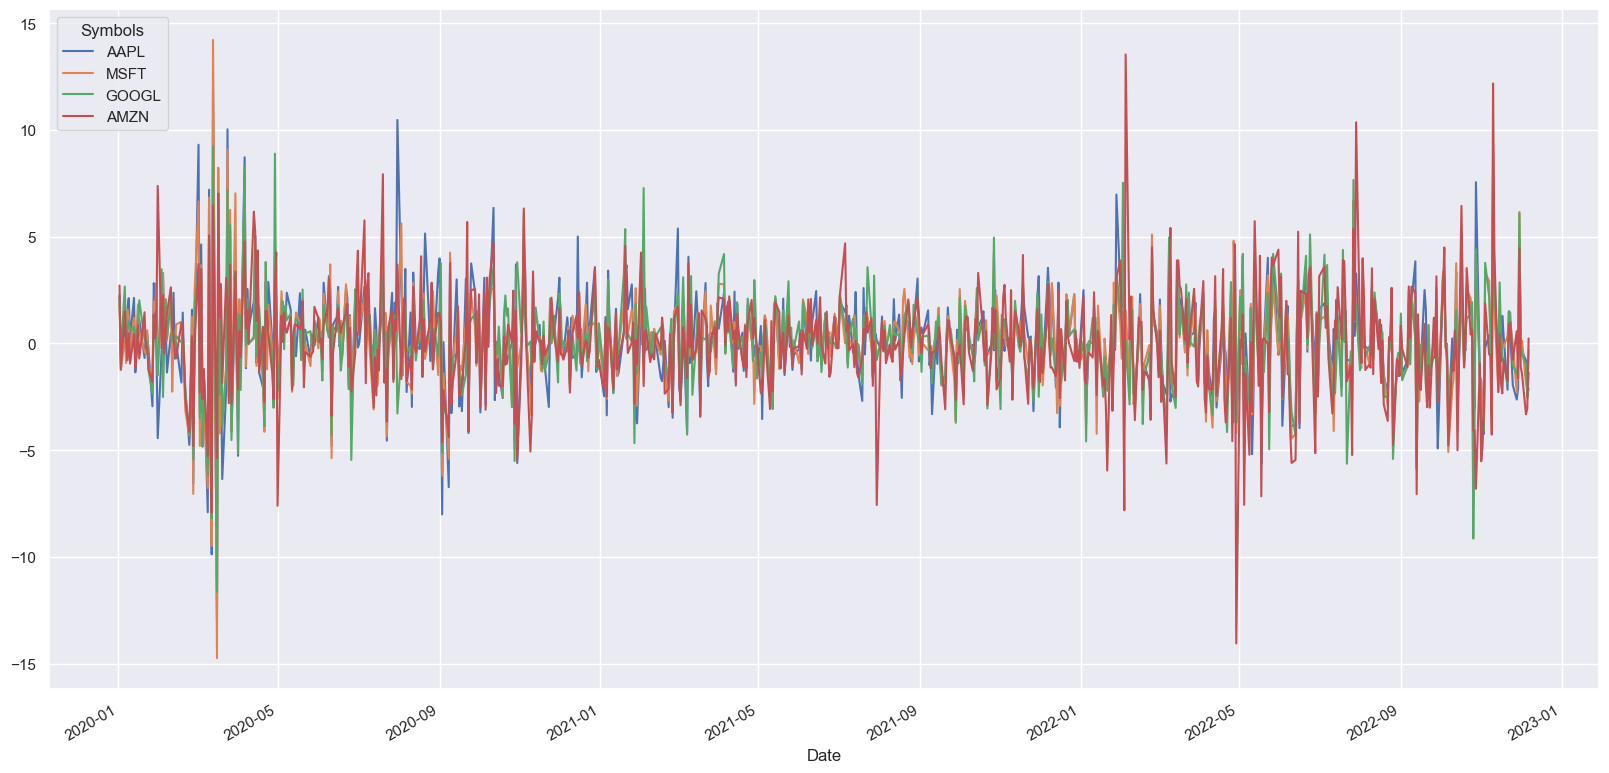

In [31]:
daily_return_avg.plot(figsize=(20,10))

7) Add a new column ‘Trend’ whose values are based on the 'Daily Return

In [32]:
def trend(x):
    if x > -0.5 and x <= 0.5:
        return 'Slight No change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'

In [33]:
df['Apple_Trend'] = daily_return_Apple.apply(lambda x:trend(x))
df['Microsoft_Trend'] = daily_return_Microsft.apply(lambda x :trend(x))
df['Google_Trend']= daily_return_Google.apply(lambda x :trend(x))
df['Amazon_Trend'] = daily_return_Apple.apply(lambda x :trend(x))

In [34]:
Apple_Trend = df['Apple_Trend']

In [35]:
df

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       GOOGL       AMZN        AAPL   
Date                                                                    
2019-12-31   71.920570  153.313187   66.969498  92.391998   73.412498   
2020-01-02   73.561531  156.151962   68.433998  94.900497   75.087502   
2020-01-03   72.846375  154.207596   68.075996  93.748497   74.357498   
2020-01-06   73.426842  154.606155   69.890503  95.143997   74.949997   
2020-01-07   73.081512  153.196518   69.755501  95.343002   74.597504   
...                ...         ...         ...        ...         ...   
2022-12-01  148.309998  254.690002  100.989998  95.500000  148.309998   
2022-12-02  147.809998  255.020004  100.440002  94.129997  147.809998   
2022-12-05  146.630005  250.199997   99.480003  91.010002  146.630005   
2022-12-06  142.910004  245.119995   96.980003  88.250000  142.910004   
2022-12-07  140.940002  244.369995   94.940002  88.459999  140.940002   

Attributes                                           High              ...  \
Symbols           MSFT       GOOGL       AMZN        AAPL        MSFT  ...   
Date                                                                   ...   
2019-12-31  157.699997   66.969498  92.391998   73.419998  157.770004  ...   
2020-01-02  160.619995   68.433998  94.900497   75.150002  160.729996  ...   
2020-01-03  158.619995   68.075996  93.748497   75.144997  159.949997  ...   
2020-01-06  159.029999   69.890503  95.143997   74.989998  159.100006  ...   
2020-01-07  157.580002   69.755501  95.343002   75.224998  159.669998  ...   
...                ...         ...        ...         ...         ...  ...   
2022-12-01  254.690002  100.989998  95.500000  149.130005  256.119995  ...   
2022-12-02  255.020004  100.440002  94.129997  148.000000  256.059998  ...   
2022-12-05  250.199997   99.480003  91.010002  150.919998  253.820007  ...   
2022-12-06  245.119995   96.980003  88.250000  147.300003  251.860001  ...   
2022-12-07  244.369995   94.940002  88.459999  143.369995  246.160004  ...   

Attributes      Volume             Apple_return Microsoft_return  \
Symbols          GOOGL        AMZN                                 
Date                                                               
2019-12-31  19514000.0  50130000.0          NaN              NaN   
2020-01-02  27278000.0  80580000.0     2.281629         1.851619   
2020-01-03  23408000.0  75288000.0    -0.972188        -1.245176   
2020-01-06  46768000.0  81236000.0     0.796837         0.258457   
2020-01-07  34330000.0  80898000.0    -0.470304        -0.911760   
...                ...         ...          ...              ...   
2022-12-01  28687100.0  68488000.0     0.189150        -0.176373   
2022-12-02  21469400.0  72427000.0    -0.337132         0.129570   
2022-12-05  24405100.0  71535500.0    -0.798317        -1.890051   
2022-12-06  24910700.0  75503600.0    -2.536999        -2.030376   
2022-12-07  31029100.0  67977300.0    -1.378491        -0.305973   

Attributes Google_return Amazon_retrun       Apple_Trend   Microsoft_Trend  \
Symbols                                                                      
Date                                                                         
2019-12-31           NaN           NaN              None              None   
2020-01-02      2.186817      2.715061          Positive          Positive   
2020-01-03     -0.523134     -1.213903   Slight Negative          Negative   
2020-01-06      2.665413      1.488557   Slight Positive  Slight No change   
2020-01-07     -0.193162      0.209162  Slight No change   Slight Negative   
...                  ...           ...               ...               ...   
2022-12-01      0.000000     -1.077275  Slight No change  Slight No change   
2022-12-02     -0.544604     -1.434558  Slight No change  Slight No change   
2022-12-05     -0.955794     -3.314560   Slight Negative          Negativ

In [36]:
df = df.iloc[1: , :]
df

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       GOOGL       AMZN        AAPL   
Date                                                                    
2020-01-02   73.561531  156.151962   68.433998  94.900497   75.087502   
2020-01-03   72.846375  154.207596   68.075996  93.748497   74.357498   
2020-01-06   73.426842  154.606155   69.890503  95.143997   74.949997   
2020-01-07   73.081512  153.196518   69.755501  95.343002   74.597504   
2020-01-08   74.257118  155.636719   70.251999  94.598503   75.797501   
...                ...         ...         ...        ...         ...   
2022-12-01  148.309998  254.690002  100.989998  95.500000  148.309998   
2022-12-02  147.809998  255.020004  100.440002  94.129997  147.809998   
2022-12-05  146.630005  250.199997   99.480003  91.010002  146.630005   
2022-12-06  142.910004  245.119995   96.980003  88.250000  142.910004   
2022-12-07  140.940002  244.369995   94.940002  88.459999  140.940002   

Attributes                                           High              ...  \
Symbols           MSFT       GOOGL       AMZN        AAPL        MSFT  ...   
Date                                                                   ...   
2020-01-02  160.619995   68.433998  94.900497   75.150002  160.729996  ...   
2020-01-03  158.619995   68.075996  93.748497   75.144997  159.949997  ...   
2020-01-06  159.029999   69.890503  95.143997   74.989998  159.100006  ...   
2020-01-07  157.580002   69.755501  95.343002   75.224998  159.669998  ...   
2020-01-08  160.089996   70.251999  94.598503   76.110001  160.800003  ...   
...                ...         ...        ...         ...         ...  ...   
2022-12-01  254.690002  100.989998  95.500000  149.130005  256.119995  ...   
2022-12-02  255.020004  100.440002  94.129997  148.000000  256.059998  ...   
2022-12-05  250.199997   99.480003  91.010002  150.919998  253.820007  ...   
2022-12-06  245.119995   96.980003  88.250000  147.300003  251.860001  ...   
2022-12-07  244.369995   94.940002  88.459999  143.369995  246.160004  ...   

Attributes      Volume             Apple_return Microsoft_return  \
Symbols          GOOGL        AMZN                                 
Date                                                               
2020-01-02  27278000.0  80580000.0     2.281629         1.851619   
2020-01-03  23408000.0  75288000.0    -0.972188        -1.245176   
2020-01-06  46768000.0  81236000.0     0.796837         0.258457   
2020-01-07  34330000.0  80898000.0    -0.470304        -0.911760   
2020-01-08  35314000.0  70160000.0     1.608623         1.592857   
...                ...         ...          ...              ...   
2022-12-01  28687100.0  68488000.0     0.189150        -0.176373   
2022-12-02  21469400.0  72427000.0    -0.337132         0.129570   
2022-12-05  24405100.0  71535500.0    -0.798317        -1.890051   
2022-12-06  24910700.0  75503600.0    -2.536999        -2.030376   
2022-12-07  31029100.0  67977300.0    -1.378491        -0.305973   

Attributes Google_return Amazon_retrun       Apple_Trend   Microsoft_Trend  \
Symbols                                                                      
Date                                                                         
2020-01-02      2.186817      2.715061          Positive          Positive   
2020-01-03     -0.523134     -1.213903   Slight Negative          Negative   
2020-01-06      2.665413      1.488557   Slight Positive  Slight No change   
2020-01-07     -0.193162      0.209162  Slight No change   Slight Negative   
2020-01-08      0.711769     -0.780864          Positive          Positive   
...                  ...           ...               ...               ...   
2022-12-01      0.000000     -1.077275  Slight No change  Slight No change   
2022-12-02     -0.544604     -1.434558  Slight No change  Slight No change   
2022-12-05     -0.955794     -3.314560   Slight Negative          Negativ

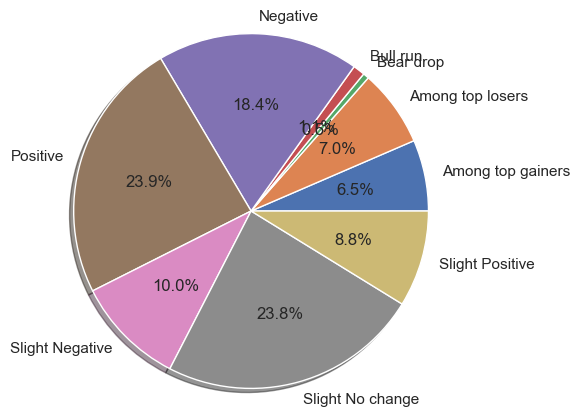

In [37]:
Apple_pie = df.groupby('Apple_Trend')
pie_label = sorted([i for i in df.loc[:, 'Apple_Trend'].unique()])
plt.pie(Apple_pie['Apple_Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 1.2,shadow = True)

plt.show()Company

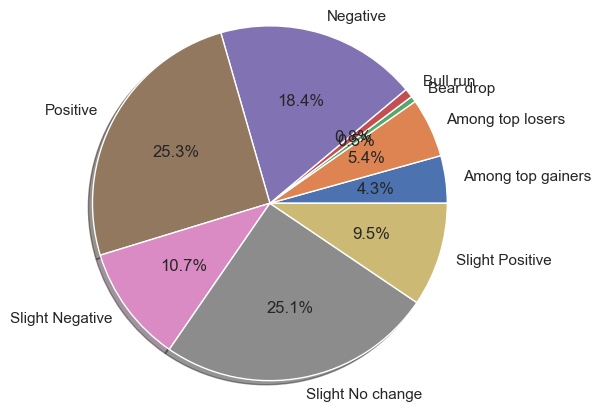

In [38]:
Microsoft_pie = df.groupby('Microsoft_Trend')
pie_label_2 = sorted([i for i in df.loc[:, 'Microsoft_Trend'].unique()])
plt.pie(Microsoft_pie['Microsoft_Trend'].count(), labels = pie_label_2, 
        autopct = '%1.1f%%', radius = 1.2,shadow = True)

plt.show()

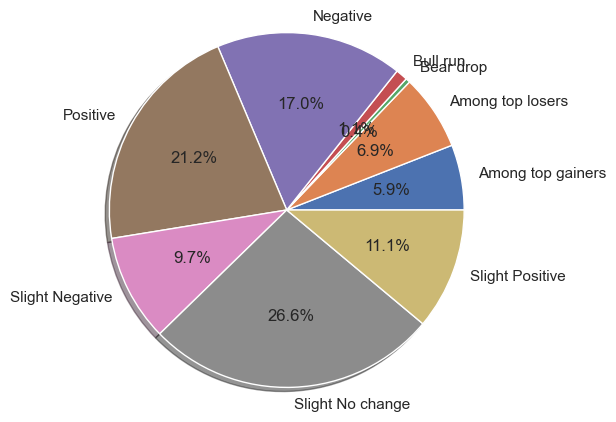

In [39]:
Google_pie = df.groupby('Google_Trend')
pie_label_3 = sorted([i for i in df.loc[:, 'Google_Trend'].unique()])
plt.pie(Google_pie['Google_Trend'].count(), labels = pie_label_3, 
        autopct = '%1.1f%%', radius = 1.2,shadow = True)

plt.show()

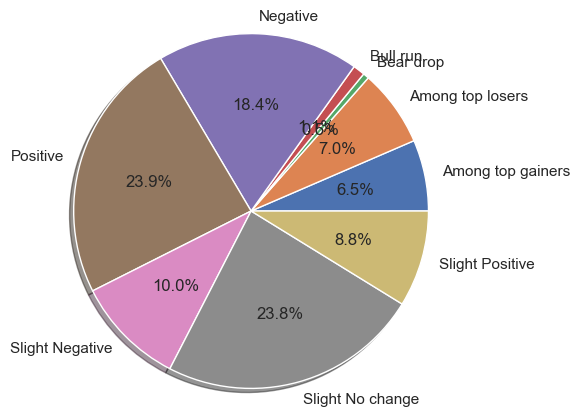

In [40]:
Amazon_pie =  df.groupby('Amazon_Trend')
pie_label_4 = sorted([i for i in df.loc[:, 'Amazon_Trend'].unique()])
plt.pie(Amazon_pie['Amazon_Trend'].count(), labels = pie_label_4, 
        autopct = '%1.1f%%', radius = 1.2,shadow = True)

plt.show()

8) What was the correlation between the daily returns of different stocks#

In [41]:
daily_return_avg.dropna(inplace= True, axis = 0)
daily_return_avg.iloc[1: , :]


Symbols,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2020-01-03,-0.972188,-1.245176,-0.523134,-1.213903
2020-01-06,0.796837,0.258457,2.665413,1.488557
2020-01-07,-0.470304,-0.911760,-0.193162,0.209162
2020-01-08,1.608623,1.592857,0.711769,-0.780864
2020-01-09,2.124077,1.249288,1.049797,0.479917
...,...,...,...,...
2022-12-01,0.189150,-0.176373,0.000000,-1.077275
2022-12-02,-0.337132,0.129570,-0.544604,-1.434558
2022-12-05,-0.798317,-1.890051,-0.955794,-3.314560


In [42]:
corr_df = daily_return_avg.corr(method='pearson')
corr_df.head().reset_index()
corr_df.head()

Symbols,AAPL,MSFT,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.810694,0.729440,0.660454
MSFT,0.810694,1.000000,0.830751,0.698830
GOOGL,0.729440,0.830751,1.000000,0.677126
AMZN,0.660454,0.698830,0.677126,1.000000


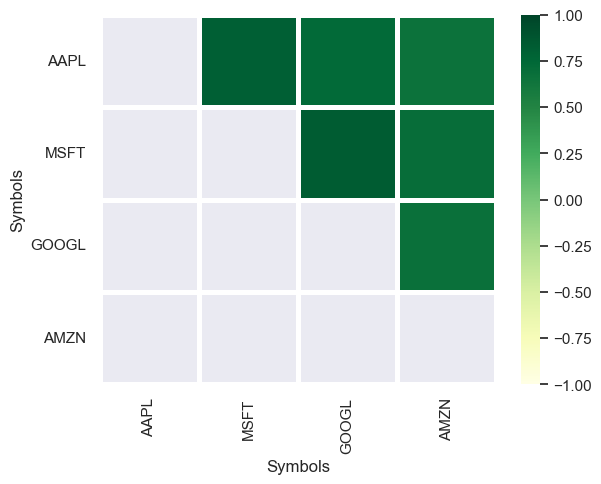

In [43]:
mask = np.zeros_like(corr_df)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(corr_df, cmap = 'YlGn', vmax = 1.0 , vmin= -1.0 ,  mask = mask, linewidths = 2.5 )
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()